# Import Libraries and preprocess dataset

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

nltk.download('stopwords')

# Load dataset
df = pd.read_csv('WELFake_Dataset.csv')

# Convert 'title' and 'text' columns to strings
df['title'] = df['title'].astype(str)
df['text'] = df['text'].astype(str)

# Preprocessing
def preprocess(text):
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    text = text.lower().split()  # Lowercase and split words
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]  # Stemming and stopword removal
    return ' '.join(text)

# Apply preprocessing
df['text'] = df['text'].apply(preprocess)


[nltk_data] Downloading package stopwords to
[nltk_data]     /media/ntu/volume1/home/s123md305_01/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
df['label'] = df['label'].map({1: True, 0: False})
df['label'] = df['label'].astype(str)
# Feature extraction
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust the number of features
X = tfidf_vectorizer.fit_transform(df['text']).toarray()
y = df['label'].values


# Model Training

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the model
model = LogisticRegression()


In [4]:
# Train the model
model.fit(X_train, y_train)


LogisticRegression()

Accuracy: 0.9429541831288556
              precision    recall  f1-score   support

       False       0.95      0.93      0.94      6948
        True       0.94      0.95      0.95      7479

    accuracy                           0.94     14427
   macro avg       0.94      0.94      0.94     14427
weighted avg       0.94      0.94      0.94     14427



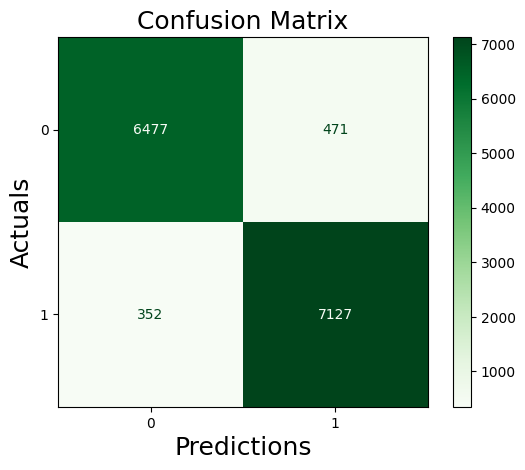

In [9]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(report)

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


# Save Model and Vectorizer

In [6]:
import joblib

joblib.dump(model,'logisticregression.pkl')

joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

# Load Model and Vectorizer

For testing purposes, please download the trained models, 'logisticregression.pkl' and 'tfidf_vectorizer.pkl' from our GitHub link and load them.

In [1]:
import joblib
model = joblib.load('logisticregression.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Unseen Testing

Change the text in unseen_news_text, and run this cell to evaluate.

In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

# You should have the stopwords downloaded before you can use them.
# nltk.download('stopwords')

# List of news texts
unseen_news_text = ["Baltimore bridge collapses after S’pore-flagged ship collision; search under way for survivors",     # Fake
                    "You Can Smell Hillary’s Fear",               # Fake
                    "Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO)",           # True
                    "New Changi Heritage Trail documents area's military, recreational and social history"]
# tokenize and encode sequences in the test set

# Preprocessing function
def preprocess(text):
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    text = text.lower().split()  # Lowercase and split words
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]  # Stemming and stopword removal
    return ' '.join(text)

# Apply preprocessing to each news text
processed_texts = [preprocess(text) for text in unseen_news_text]

# You can now use processed_texts as needed
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'training_data' is a collection of documents you used or can use for training # Adjust the number of features
X = tfidf_vectorizer.transform(processed_texts)

# Step 2: Prediction
# Use the logistic regression model to predict the labels for the new data
predictions = model.predict(X)

# The 'predictions' array now contains the predicted labels for your unseen news text
print(predictions)

['True' 'True' 'True' 'True']


# Conduct Blind Testing

In [3]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

#nltk.download('stopwords')

# Load dataset
df = pd.read_csv('news.csv')

# Convert 'title' and 'text' columns to strings
df['title'] = df['title'].astype(str)
df['text'] = df['text'].astype(str)

# Preprocessing
def preprocess(text):
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    text = text.lower().split()  # Lowercase and split words
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]  # Stemming and stopword removal
    return ' '.join(text)

# Apply preprocessing
df['text'] = df['text'].apply(preprocess)


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
df['label'] = df['label'].map({'REAL': True, 'FAKE': False})
df['label'] = df['label'].astype(str)
# Feature extraction # Adjust the number of features
X = tfidf_vectorizer.fit_transform(df['text']).toarray()
y = df['label'].values


In [5]:
y_pred = model.predict(X)


Accuracy: 0.45035516969218625
              precision    recall  f1-score   support

       False       0.32      0.09      0.14      3164
        True       0.47      0.81      0.60      3171

    accuracy                           0.45      6335
   macro avg       0.40      0.45      0.37      6335
weighted avg       0.40      0.45      0.37      6335



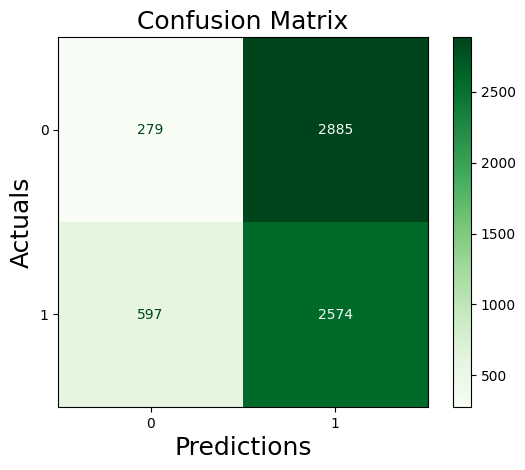

In [7]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

accuracy = accuracy_score(y, y_pred)
report = classification_report(y, y_pred)
print(f'Accuracy: {accuracy}')
print(report)
conf_matrix = confusion_matrix(y, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# WELFake Wordcloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /media/ntu/volume1/home/s123md305_01/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


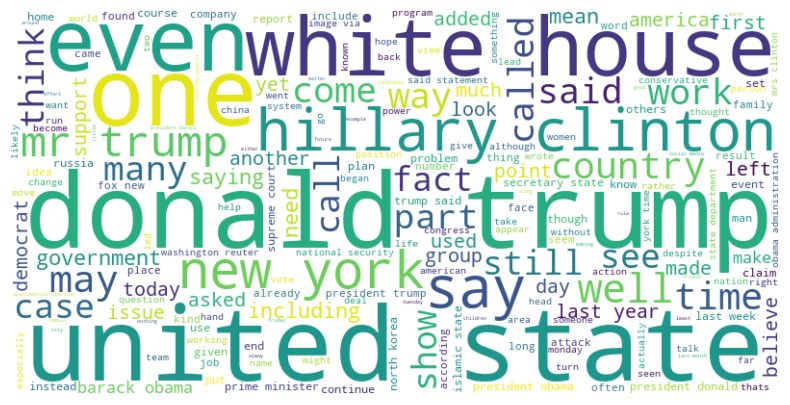

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
import nltk

# Ensure NLTK stopwords are downloaded (do this once)
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv('WELFake_Dataset.csv')

df['title'] = df['title'].astype(str)
df['text'] = df['text'].astype(str)
# Preprocess the text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Apply the preprocessing to the title column
df['text_processed'] = df['text'].apply(preprocess_text)

# Combine all titles into a single text
text = ' '.join(df['text_processed'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# news Wordcloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /media/ntu/volume1/home/s123md305_01/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


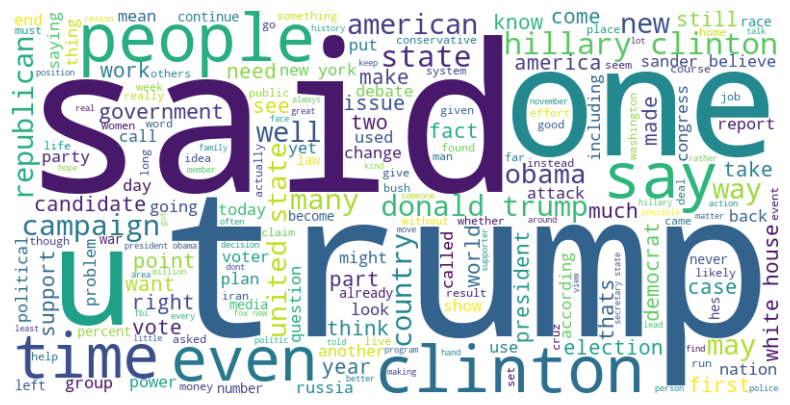

In [8]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
import nltk

# Ensure NLTK stopwords are downloaded (do this once)
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv('news.csv')

df['title'] = df['title'].astype(str)
df['text'] = df['text'].astype(str)
# Preprocess the text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Apply the preprocessing to the title column
df['text_processed'] = df['text'].apply(preprocess_text)

# Combine all titles into a single text
text = ' '.join(df['text_processed'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()